# Title: Our Goal is Stopping Yours



# Overview

When it comes to sports,  athletes alone cannot make up a great team, but a great teams need great fans as well. Fans are what provide a team with money and provide players with a good sense of morale. Through our research we attempted to see how influential fans were to a team's ability to win.  We primarily focused on teams within La Liga, men's top professional football division of the Spanish football league system, and wanted to see if home team advantage existed. We wanted to see if there were any correlations between when teams played at home (a teams home stadium) versus when teams played away (playing at the opposing team's stadium) and why?


# Name and Contributions

- Jung Yue:      analyzed results to create detailed descriptions and explanations, conducted research for datasets
- Haifeng Lan:   Found data set of La Liga and came up with hypothesis, approaches to analysis and introduced background. Came up with the overall structure of the report. Wrote discussion of each analysis and plotted the graphs of goal proportions for La Liga and EPL. 
- Catherine Tao: Data cleaned, found home team advantage proportions, included images and descriptions, found OLS regression for home wins and goals, wrote discussion
- Kwok Wong:     supported reasons as to why home team advantage is decreasing, found OLS regression outline
- Aaron Sun:     analyzed results to create detailed descriptions and explanations, created conclusion
- Jiaxin Li:     made graphs and plots for each analysis

# Group Members IDs

- A15205395
- A13698837
- A13367376
- A15707350
- A14984280
- A13990091

# Research Question

- Through the analysis of the La Liga’s, The Spanish Soccer League, statistic we are interested in whether the home team advantage exists.
- Furthermore, if we examine this from a longitudinal viewpoint, is home team advantage increasing or decreasing? 


# Background and Prior Work


The phrase “home court advantage” has been thrown around throughout many sports but not much research has been done to find the existence of it. Our two primary questions for this research was if home field advantage existed and if it did exist, was it increasing or decreasing over time. So our first task for this project was to see if home advantage existed first. 

Most of our group members had an appreciation for sports which made this research very fascinating. Although our study focuses on soccer, this research could be applicable to other sports as well. Kaggle provided a convenient data set of soccer to work with which is why we settled with soccer. 

The data set we retrieved from Kaggle.com contained useful information. It presented 47 seasons from 1970-2017 and also every game played within that time period. For each game a team played during the 47 time span, the data set showed information regarding the outcome of each game. Information such as home & away wins, home & away goals, goal differences. 

La Liga Dataset Link to the dataset: https://www.kaggle.com/spn007/la-liga-dataset

# Hypothesis

We expect to see the existence of a home advantage. The proportion of wins of games played on a team’s home field should be higher than the proportion of games won played on an opponent’s field. We believe the support of the home crowd motivates players to perform better thus resulting in more games won within their own stadium. However, if it were to exist, we also expect home advantage is decreasing over time. With the rise in traveling over the years, fans supporting their team at away games is becoming a growing phenomenon. The home crowd is not as valuable as it once was and will, as a result, cause home advantage to not be as beneficial as well. Therefore, our hypothsises are:
1. Home Advantage does exist in soccer.
2. Home advantage of soccer is decreasing with time.


# Dataset(s)

Dataset Name: La Liga Dataset
Link to the dataset: https://www.kaggle.com/spn007/la-liga-dataset
Number of observations: 908

Our primary dataset was created by Sakti Prasad and found on kaggle.com. It includes data of all the matches played in the La Liga soccer league over 47 years (1970-2017). 

Dataset Name: EPL Dataset
Link to the dataset: https://www.kaggle.com/devinharia/epl-dataset
Number of observations: 1702

Another dataset we utilisized for our research is the English Premier League Dataset we found from kaggle.com.  This dataset helps prove that stronger teams have a larger fan population and distribution around the country dating from 2000-2018.


We plan to combine these datasets by having the EPL dataset support our observations for our main dataset of La Liga.

# Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import math
from scipy import optimize
import patsy
import statsmodels.api as sm
import webbrowser
from IPython.display import Image


# Data Cleaning

In [2]:
# Read the CSV and storing the CSV int df
df = pd.read_csv("LaLiga_dataset.csv")

In [3]:
#show the data frame (df)
df

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7
5,1970-71,Sporting de Gijon,9,1,4,11,10,15,5,30,35,29,6,35,44,-9
6,1970-71,CD Malaga,6,2,3,7,8,10,12,30,36,14,13,27,32,-5
7,1970-71,Granada,9,1,1,11,10,12,8,30,38,24,9,33,34,-1
8,1970-71,Real Sociedad,9,1,3,8,10,11,9,30,39,18,5,23,27,-4
9,1970-71,Sevilla,11,2,1,10,13,11,6,30,45,26,8,34,42,-8


We need to divide each match drawn and total matches drown by 2 becuase of duplicates
- for example if team A ties with team B both teams get 1 matches drawn so if you add up matches drawn between the two teams there would be 2 games drawn instead of 1. 

In [4]:
# Divide each match drawn and total matches by 2 because of duplicates
# Shows df but matches_drawn and total_matches columns are divided by 2
df['matches_drawn'] = df['matches_drawn'].div(2)
df['total_matches'] = df['total_matches'].div(2)
df

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,4.5,15.0,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,5.0,15.0,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,5.0,15.0,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,2.5,15.0,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,4.5,15.0,33,13,5,18,25,-7
5,1970-71,Sporting de Gijon,9,1,4,11,10,15,2.5,15.0,35,29,6,35,44,-9
6,1970-71,CD Malaga,6,2,3,7,8,10,6.0,15.0,36,14,13,27,32,-5
7,1970-71,Granada,9,1,1,11,10,12,4.0,15.0,38,24,9,33,34,-1
8,1970-71,Real Sociedad,9,1,3,8,10,11,4.5,15.0,39,18,5,23,27,-4
9,1970-71,Sevilla,11,2,1,10,13,11,3.0,15.0,45,26,8,34,42,-8


## Making Dictionaries for Each Season

In [5]:
# Df of all years
year = df[['season']]

# Convert the data frame into a list of years
years = year.values.tolist() 

# Create a list of unique seasons by appending from years
unique_seasons = []
for i in years:
    if i not in unique_seasons:
        unique_seasons.append(i)
# Getting rid of the brackets within the list
year_str = []
for i in range(len(unique_seasons)):
    j = 0
    year_str.append(unique_seasons[i][j])
    j += 1
    
# Initalize 3 list for home win, away win and matches drawn percentage per season    
home = []
away = []
tie = []
hgoal = []
agoal = []

# Adds to matches drawn,home win and away win percentage every season 
for i in year_str:
    df = df.loc[df['season'] == i]
    home_win = df['home_win'].sum()
    away_win = df['away_win'].sum()
    matches_drawn = df['matches_drawn'].sum()
    total = home_win + away_win + matches_drawn
    home_goal = df['home_goals'].sum()
    away_goal = df['away_goals'].sum()
    total_goal = home_goal + away_goal 

    home_proportion = home_win / total
    home.append(home_proportion)

    away_proportion = away_win / total
    away.append(away_proportion)
    
    homeg_proportion = home_goal / total_goal
    hgoal.append(homeg_proportion)

    awayg_proportion = away_goal / total_goal
    agoal.append(awayg_proportion)

    matches_drawn_proportion = matches_drawn / total
    tie.append(matches_drawn_proportion)
    
    df = pd.read_csv("LaLiga_dataset.csv")
    
df

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7
5,1970-71,Sporting de Gijon,9,1,4,11,10,15,5,30,35,29,6,35,44,-9
6,1970-71,CD Malaga,6,2,3,7,8,10,12,30,36,14,13,27,32,-5
7,1970-71,Granada,9,1,1,11,10,12,8,30,38,24,9,33,34,-1
8,1970-71,Real Sociedad,9,1,3,8,10,11,9,30,39,18,5,23,27,-4
9,1970-71,Sevilla,11,2,1,10,13,11,6,30,45,26,8,34,42,-8


## Graphing Proportion of Home Team Win

[ 1.45406145e-04 -5.82597644e-01  5.83949281e+02]
[[ 1.10493111e-09 -4.40425575e-06  4.38863788e-03]
 [-4.40425575e-06  1.75555273e-02 -1.74934357e+01]
 [ 4.38863788e-03 -1.74934357e+01  1.74317251e+04]]
<class 'numpy.ndarray'>


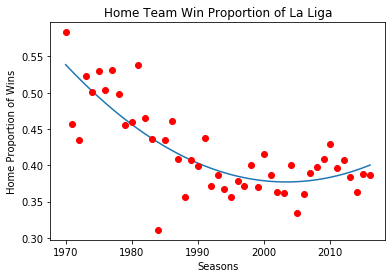

In [6]:
# creates years list in ints
years_ints = [i for i in range(1970,2017)]
years_ints = np.array(years_ints)

def test_func1(x,a,b,c):
    return a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func1, years_ints, home)
print(params)
print(params_covariance)

# Plot of Home Team Win proportions in a dot plot with a curve fit based on the data
plt.title('Home Team Win Proportion of La Liga')
plt.plot(years_ints, test_func1(years_ints, *params))
plt.plot(years_ints, home, 'ro')
plt.xlabel('Seasons')
plt.ylabel('Home Proportion of Wins')
print(type(years_ints))

## Graphing Proportion of Away Team Wins

Text(0, 0.5, 'Away Proportion of Wins')

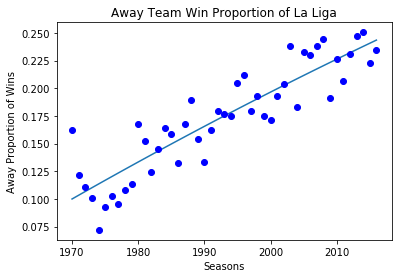

In [7]:
def test_func2(x,a,b,c):
    return -a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func2, years_ints, away)

# Plot of Away Team Win proportions in a dot plot with a curve fit based on the data
plt.title('Away Team Win Proportion of La Liga')
plt.plot(years_ints, test_func2(years_ints, *params))
plt.plot(years_ints, away, 'bo')
plt.xlabel('Seasons')
plt.ylabel('Away Proportion of Wins')

## Graphing Proportion of Tie Matches

Text(0, 0.5, 'Tie Proportions')

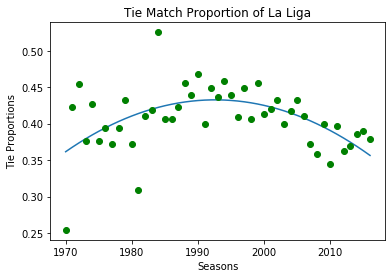

In [8]:
def test_func3(x,a,b,c):
    return -a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func3, years_ints, tie)

# Plot of Tie proportions in a dot plot with a curve fit based on the data
plt.plot(years_ints, test_func3(years_ints, *params))
plt.title('Tie Match Proportion of La Liga')
plt.plot(years_ints, tie, 'go')
plt.xlabel('Seasons')
plt.ylabel('Tie Proportions')

As we can see from above graphs, the honme team winning percentage is going down through last half century; away team wining percentage is going up on contrary. However, although home team winning percentage is decreasing, it is always significantly higher than the percentage of away team wins. We can see that home advantage does exist in La Liga. However, we also see that portion of tie matches fluctuate with time and remains at about 40%. It does not have a clear correlation with seasons but it does effect our analysis on wining percentages. Therefore, we conducted another analysis by calculating percentage of goals scored at home of all teams in La Liga. This analysis does not directly reflect home advantage effect on match result, but it does avoid influence of uncertain factors like tie matches.

[ 7.39861570e-05 -2.97895739e-01  3.00439214e+02]
[[ 2.45609466e-10 -9.78999445e-07  9.75527868e-04]
 [-9.78999445e-07  3.90232835e-03 -3.88852649e+00]
 [ 9.75527868e-04 -3.88852649e+00  3.87480931e+03]]


Text(0, 0.5, 'Home Proportion of Goals')

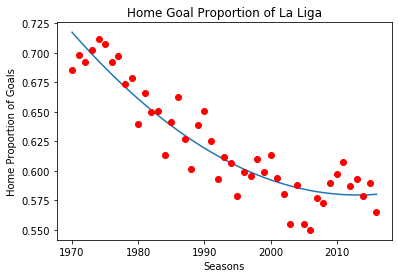

In [9]:
def test_func5(x,a,b,c):
    return a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func1, years_ints, hgoal)
print(params)
print(params_covariance)

plt.plot(years_ints, test_func1(years_ints, *params))
plt.plot(years_ints, hgoal, 'ro')
plt.title('Home Goal Proportion of La Liga')
plt.xlabel('Seasons')
plt.ylabel('Home Proportion of Goals')

[-7.39883267e-05  2.97904387e-01 -2.99447832e+02]
[[ 2.45634268e-10 -9.79097702e-07  9.75625183e-04]
 [-9.79097702e-07  3.90271758e-03 -3.88891198e+00]
 [ 9.75625183e-04 -3.88891198e+00  3.87519107e+03]]


Text(0, 0.5, 'Away Proportion of Goals')

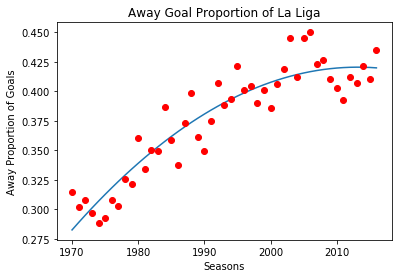

In [10]:
def test_func5(x,a,b,c):
    return a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func1, years_ints, agoal)
print(params)
print(params_covariance)

plt.plot(years_ints, test_func1(years_ints, *params))
plt.plot(years_ints, agoal, 'ro')
plt.title('Away Goal Proportion of La Liga')
plt.xlabel('Seasons')
plt.ylabel('Away Proportion of Goals')


In [11]:
df = pd.read_csv("LaLiga_dataset.csv")
outcome_1, predictors_1 = patsy.dmatrices('home_win ~ goals_scored', df)

mod_1 = sm.OLS(outcome_1, predictors_1)
type(mod_1) # see type of mod_1
res_1 = mod_1.fit() # fits the model
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               home_win   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     864.9
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          5.31e-134
Time:                        19:50:38   Log-Likelihood:                -2013.1
No. Observations:                 908   AIC:                             4030.
Df Residuals:                     906   BIC:                             4040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9287      0.238     12.306   

From the graphs of Goal Proportions, we can tell that the home advatange indeed exist, since percentage of goals scored at home is always higher than that of away games. The analysis also proved our second hypothesis, home advantage of soccer is decreasing becasue teams are scoring less goals at home compare to past seasons. The percantage decreased by more than 10% for last 47 seasons. The next step is the figure out why this phenomenom happen. 

# Data Analysis and Results

Our first analysis focuses on figuring out whether home advantage exists or not. According to our data Home advantage does exist since there are more home wins then there are away wins. If we compare the proportion of home wins and away wins with each other we can see that there is always a higher proportion of home wins then there are of away wins

Now that we have discovered the existence of Home Team advantage we have to see whether it is going up or down if we look at it longitudinally. Looking at the graph of the proportion of home team wins we can see that home team wins are decreasing over time. 

## Why Home Team Advantage is Going Down?

### Why Home Team Advantage is Going Down (Part A)

In [12]:
# DIVIDE MATCHES BY 2
df = pd.read_csv("LaLiga_dataset.csv")
# print(df)

counts = df['club'].value_counts()
# print(counts)

athletic_club = df.loc[df['club'] == 'Athletic Club']
# dataframe of athletic club
barcelona = df.loc[df['club'] == 'Barcelona']
# dataframe of barcelona
real_madrid = df.loc[df['club'] == 'Real Madrid']
# dataframe of real madrid
valencia = df.loc[df['club'] == 'Valencia']
# dataframe of valencia

merged = pd.concat([athletic_club, barcelona, real_madrid])
merged
# combined into one datadrame

# function that takes in dataframe and returns home and away proportions.
def proportions(dataframe, year_str):
    # dataframe['matches_drawn'].div(2)

    home = []
    away = []
    temp = dataframe
    # set a temp so we don't change the orginal dataframe

    for i in year_str:
        temp = temp.loc[temp['season'] == i] # goes through each season
        home_win = temp['home_win'].iloc[0] # gets home wins
        away_win = temp['away_win'].iloc[0] # gets away wins

        home_total = temp['total_matches'].div(2).iloc[0] # get number of home games by dividing total games by 2

        home_proportion = home_win / home_total # formula to find proportion
        home.append(home_proportion) 
        # print(home_proportion)

        away_proportion = away_win / home_total # formula to find away proportion, number of away games same as home games
        away.append(away_proportion)
        # print(away_proportion)

        temp = dataframe #reset dataframe

    return home, away #returns home and away proportions

# ran the above function for athletic club
x = proportions(athletic_club, year_str) 
athletic_club_home = x[0]
athletic_club_away = x[1]

ac_home_mean = sum(athletic_club_home) / len(athletic_club_home)
print(ac_home_mean)
# average home proportion over all years

ac_away_mean = sum(athletic_club_away) / len(athletic_club_away)
print(ac_away_mean)
# average away proportion over all years

# ran the above function for barcelona
y = proportions(barcelona, year_str)
barcelona_home = y[0]
barcelona_away = y[1]

barc_home_mean = sum(barcelona_home) / len(barcelona_home)
print(barc_home_mean)

barc_away_mean = sum(barcelona_away) / len(barcelona_away)
print(barc_away_mean)

# ran the above function for real madrid
z = proportions(real_madrid, year_str)
real_madrid_home = z[0]
real_madrid_away = z[1]

rm_home_mean = sum(real_madrid_home) / len(real_madrid_home)
print(rm_home_mean)

rm_away_mean = sum(real_madrid_away) / len(real_madrid_away)
print(rm_away_mean)


0.5858169145699611
0.22414156337481547
0.7522568795409847
0.42714794153434565
0.7659765524860053
0.4437843670502915


One reason for the decrease of home team advantage that we researched was that maybe the bottom tier teams were dragging the home team proportion down. If a bottom tier team played at home and went agaisnt a top tier team, the top tier team would most likely win. Home team advantage would not help bottom tier teams beat the top tier teams. In La Liga, the bottom three teams will be relegated at the end of the season and three new teams will join in the coming season. By counting the number of seasons each team played in La Liga, we gound that only three teams, FC Barcelona, Real Madrid C.F. and Atheletico Club stayed in the league the whole time. We calculated the wining percentages of the three teams both at home and away. The home win proportion of a good team such as Real Madrid there home win proportion is significantly higher than the average of all teams. Therefore, we can conclude that bottom tier teams drag the whole league's home advantage down because bottom tier teams lose more than win even when playing at home.

### Why Home Team Advantage is Going Down (Part B)

#### Graphing Standard Deviation of Home Wins

Text(0, 0.5, 'Standard Deviation of Home win')

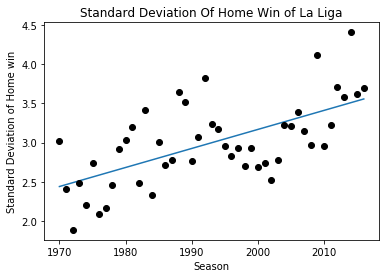

In [13]:
def test_func4(x,a,b):
    return a*x+b

import math
df = pd.read_csv("LaLiga_dataset.csv")

# Get the standard deviation of the home wins per seasons and store them in a numpy array
plt1 = np.array(df.groupby("season")['home_win'].std())

params,params_covariance = optimize.curve_fit(test_func4, years_ints, plt1)

plt.plot(years_ints, test_func4(years_ints, *params))
plt.title('Standard Deviation Of Home Win of La Liga')
plt.plot(years_ints, plt1, 'go',color='black')
plt.xlabel('Season')
plt.ylabel('Standard Deviation of Home win')

#### Graphing Standard Devation of Points

Text(0, 0.5, 'Standard Deviation of Points')

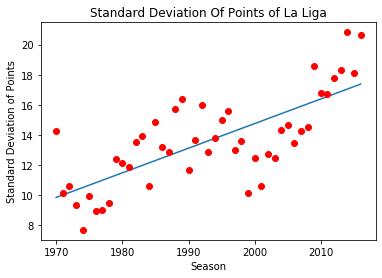

In [14]:
def test_func4(x,a,b):
    return a*x+b
import math
df = pd.read_csv("LaLiga_dataset.csv")

# Get the standard deviation of the Points per seasons and store them in a numpy array
plt2 = np.array(df.groupby("season")['points'].std())

params,params_covariance = optimize.curve_fit(test_func4, years_ints, plt2)

plt.plot(years_ints, test_func4(years_ints, *params))
plt.title('Standard Deviation Of Points of La Liga')
plt.plot(years_ints, plt2, 'go',color='red')
plt.xlabel('Season')
plt.ylabel('Standard Deviation of Points')

Looking at the graph of Standard Deviation of Home Wins we can see that standard deviation of home win is increasing with each season. Looking at Barcelona wins over the seasons we see that the average wins every season is increasing other time. Whereas teams that aren't good gets kicked out of the league most likely or with Granada their home wins are decreasing. What we can infer from this data is that the good teams don't every face relegation because they always rank high but other teams do. Therefore the win difference between good teams and bad teams are increasing as good teams are only getting better while the bad teams are either facing relegation or struggling to remain in the league. So the trend of good teams getting better and bad teams remaining bad is what causes the trend in standard deviation increase, as bad teams are always struggle to remain in the league never being able to go up in rank. As the analysis shows, only a few teams are getting extremly strong (FC Barcelona, Real Madrid C.F.) while more teams are getting weaker. Thus, if we take average over all teams in the league, the percentage of home wins goes down.

In [15]:
df = pd.read_csv("LaLiga_dataset.csv")
df[df['club']=='Barcelona']

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
15,1970-71,Barcelona,11,8,3,3,19,6,5,30,62,32,18,50,22,28
31,1971-72,Barcelona,11,6,3,5,17,8,9,34,60,24,16,40,26,14
50,1972-73,Barcelona,12,6,1,5,18,6,10,34,64,28,13,41,21,20
69,1973-74,Barcelona,15,6,0,5,21,5,8,34,71,49,26,75,24,51
85,1974-75,Barcelona,12,3,0,12,15,12,7,34,52,42,15,57,36,21
104,1975-76,Barcelona,15,3,0,9,18,9,7,34,61,41,20,61,41,20
122,1976-77,Barcelona,13,5,1,6,18,7,9,34,63,53,16,69,34,35
140,1977-78,Barcelona,13,3,1,8,16,9,9,34,57,37,12,49,29,20
155,1978-79,Barcelona,14,2,2,10,16,12,6,34,54,54,15,69,37,32
174,1979-80,Barcelona,12,1,1,8,13,9,12,34,51,25,17,42,33,9


In [16]:
df[df['club']=='Granada']

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
7,1970-71,Granada,9,1,1,11,10,12,8,30,38,24,9,33,34,-1
28,1971-72,Granada,13,1,0,12,14,12,8,34,50,29,11,40,34,6
37,1972-73,Granada,8,1,3,11,9,14,11,34,38,20,5,25,32,-7
64,1973-74,Granada,10,2,1,9,12,10,12,34,48,25,9,34,35,-1
72,1974-75,Granada,9,1,1,12,10,13,11,34,41,27,8,35,47,-12
89,1975-76,Granada,7,1,4,12,8,16,10,34,34,19,10,29,50,-21
791,2011-12,Granada,8,4,6,14,12,20,6,38,42,22,13,35,56,-21
813,2012-13,Granada,6,5,7,11,11,18,9,38,42,21,16,37,54,-17
833,2013-14,Granada,7,5,11,10,12,21,5,38,41,18,14,32,56,-24
850,2014-15,Granada,4,3,5,12,7,17,14,38,35,13,16,29,64,-35


# Analysis of the OLS regression of Clubs as a predictor of Home Wins
In above analysis the top 4 teams have the lowest P value meaning that those 4 teams are the best predictors to winning. Whereas, as you move toward teams that are worst they have a higher P value indicating that they are not good predictors for home wins. This support our analysis that Teams that are good are more likely to win at home because they are good. This makes sense with our standard deviation analysis of home wins because the top 4 teams likely win all their home wins so they cause an increase in the standard deviation. It's increasing because good teams are getting better as there isn't a salary gap in La Liga so they are getting more money and getting better players.

In [17]:
df = pd.read_csv("LaLiga_dataset.csv")
outcome_1,predictors_1 = patsy.dmatrices("home_win ~ club",df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               home_win   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.13e-64
Time:                        19:50:39   Log-Likelihood:                -2086.6
No. Observations:                 908   AIC:                             4277.
Df Residuals:                     856   BIC:                             4527.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Why Home Team Advantage is Going Down (Part C)


The third reason that home advantage in soccer is overall decreasing is that stronger teams get more fans around the country. Therefore, even when they are playing away, they have enough fans to support them in the match. The increase of strong teams' away support results in the drop of weak teams' home advantge. On twitter interaction, we found the fan distribution of teams in English Premier League, the top level of the English football league system. We also found a good data set of performance in EPL on Kaggle. First we need to make sure that EPL's home advantage is decreasing over time as La Liga does.

In [18]:
# show data frame
df = pd.read_csv("EPL-2000-2018.csv")
season = df[['Season']]
season = season.values.tolist()
unique_seasons = []

for i in season:
    if i not in unique_seasons:
        unique_seasons.append(i)

year_str = []
for i in range(len(unique_seasons)):
    j = 0
    year_str.append(unique_seasons[i][j])
    j += 1

df = pd.read_csv("EPL-2000-2018.csv")

#print(year_str)
home = []
away = []
tie = []
hg = []
ag = []
for i in range(len(year_str)):
    hello = df.loc[df['Season']==year_str[i]]
    home_win = len(hello.loc[hello['FTR']=="H"])
    away_win = len(hello.loc[hello['FTR']=="A"])
    matches_drawn = len(hello.loc[hello['FTR']=="D"])
    total = home_win + away_win + matches_drawn
    home_goal = hello['FTHG'].sum()
    away_goal = hello['FTAG'].sum()
    total_goal = home_goal+away_goal
    
    home_goal_proportion = home_goal / total_goal
    hg.append(home_goal_proportion)
    
    away_goal_proportion = away_goal / total_goal
    ag.append(away_goal_proportion)

    home_proportion = home_win / total
    home.append(home_proportion)

    away_proportion = away_win / total
    away.append(away_proportion)

    matches_drawn_proportion = matches_drawn / total
    tie.append(matches_drawn_proportion)


In [19]:
years_ints = [i for i in range(2000,2017)]
years_ints = np.array(years_ints)
years_ints
print(len(years_ints))
print(len(home))

17
17


Text(0, 0.5, 'Home Goal Proportions')

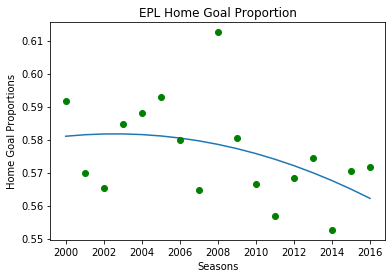

In [20]:
def test_funchg(x,a,b,c):
    return -a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_funchg, years_ints, hg)

# Plot of Tie proportions in a dot plot with a curve fit based on the data
plt.plot(years_ints, test_funchg(years_ints, *params))
plt.title('EPL Home Goal Proportion')
plt.plot(years_ints, hg, 'go')
plt.xlabel('Seasons')
plt.ylabel('Home Goal Proportions')

Text(0, 0.5, 'Away Goal Proportions')

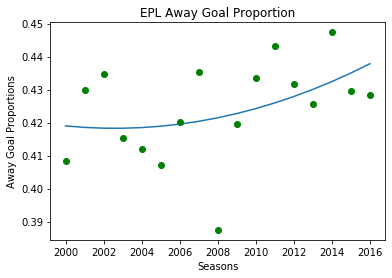

In [21]:
def test_funcag(x,a,b,c):
    return -a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func3, years_ints, ag)

# Plot of Tie proportions in a dot plot with a curve fit based on the data
plt.plot(years_ints, (test_funcag(years_ints, *params)))
plt.title('EPL Away Goal Proportion')
plt.plot(years_ints, ag, 'go')
plt.xlabel('Seasons')
plt.ylabel('Away Goal Proportions')

[ 2.60988529e-06 -1.21389350e-02  1.43177934e+01]
[[ 8.49572836e-08 -3.41188379e-04  3.42551023e-01]
 [-3.41188379e-04  1.37021386e+00 -1.37568786e+03]
 [ 3.42551023e-01 -1.37568786e+03  1.38118536e+06]]
<class 'numpy.ndarray'>


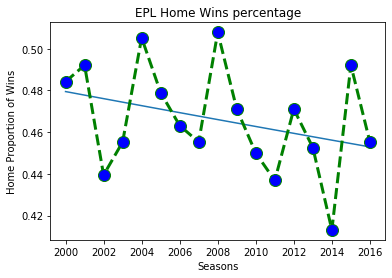

In [22]:
def test_func1(x,a,b,c):
    return a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func1, years_ints, home)
print(params)
print(params_covariance)

plt.plot(years_ints, test_func1(years_ints, *params))
plt.title('EPL Home Wins percentage')
plt.plot(years_ints, home, 'ro',color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('Seasons')
plt.ylabel('Home Proportion of Wins')
print(type(years_ints))

[ 4.68469990e-05 -1.85738167e-01  1.84349501e+02]
[[ 6.47919155e-08 -2.60204330e-04  2.61243589e-01]
 [-2.60204330e-04  1.04498181e+00 -1.04915671e+03]
 [ 2.61243589e-01 -1.04915671e+03  1.05334954e+06]]
<class 'numpy.ndarray'>


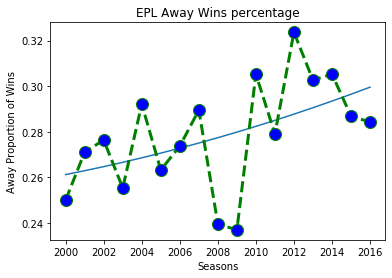

In [23]:
def test_func1(x,a,b,c):
    return a*(x*x)+b*x+c
params,params_covariance = optimize.curve_fit(test_func1, years_ints, away)
print(params)
print(params_covariance)

plt.plot(years_ints, test_func1(years_ints, *params))
plt.title('EPL Away Wins percentage')
plt.plot(years_ints, away, 'ro',color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('Seasons')
plt.ylabel('Away Proportion of Wins')
print(type(years_ints))

The graphs above proves both our hypothesis. Home Advantage does exist in EPL since teams win more and score more at home for every season. The graphs also shows that teams' home win proportion and home goal proportion are dropping for the 17 seasons. Therefore, EPL has the same trend as La Liga.

In [24]:
df = pd.read_csv("EPL-2000-2018.csv")
team = df[['HomeTeam']]
team = team.values.tolist()
unique_teams = []
for i in team:
    if i not in unique_teams:
        unique_teams.append(i)

team_str = []
for i in range(len(unique_teams)):
    j = 0
    team_str.append(unique_teams[i][j])
    j += 1


def test_func3(team_name):
    home1 = []
    away1 = []
    tie1 = []
    df = pd.read_csv("EPL-2000-2018.csv")
    df = df.loc[df['HomeTeam']== team_name]
    for i in range(len(year_str)):
        hello = df.loc[df['Season']== year_str[i]]
        home_win = len(hello.loc[hello['FTR']=="H"])
        away_win = len(hello.loc[hello['FTR']=="A"])
        matches_drawn = len(hello.loc[hello['FTR']=="D"])
        total = home_win + away_win + matches_drawn

        home_proportion = home_win / total
        home1.append(home_proportion)

        away_proportion = away_win / total
        away1.append(away_proportion)

        matches_drawn_proportion = matches_drawn / total
        tie1.append(matches_drawn_proportion)
    return home1,away1,tie1

def test_func4(team_name):
    home1 = []
    away1 = []
    tie1 = []
    df = pd.read_csv("EPL-2000-2018.csv")
    df = df.loc[df['AwayTeam']== team_name]
    for i in range(len(year_str)):
        hello = df.loc[df['Season']== year_str[i]]
        home_win = len(hello.loc[hello['FTR']=="H"])
        away_win = len(hello.loc[hello['FTR']=="A"])
        matches_drawn = len(hello.loc[hello['FTR']=="D"])
        total = home_win + away_win + matches_drawn
        if(total > 0):
            home_proportion = home_win / total
            home1.append(home_proportion)

            away_proportion = away_win / total
            away1.append(away_proportion)

            matches_drawn_proportion = matches_drawn / total
            tie1.append(matches_drawn_proportion)
        else:
            home1.append(0)
            away1.append(0)
            tie1.append(0)
    return home1,away1,tie1
def test_func5(team_name):
    home1 = []
    away1 = []
    df = pd.read_csv("EPL-2000-2018.csv")
    df = df.loc[df['HomeTeam']== team_name]
    for i in range(len(year_str)):
        hello = df.loc[df['Season']== year_str[i]]
        home_win = hello['HF'].sum()
        away_win = hello['AF'].sum()
        total = home_win + away_win
        if(total > 0):
            home_proportion = home_win / total
            home1.append(home_proportion)

            away_proportion = away_win / total
            away1.append(away_proportion)
        else:
            home1.append(0)
            away1.append(0)
    return home1,away1
home1,away1 = test_func5("Man United")

Text(0, 0.5, "Team's Away Proportion Dot Plot")

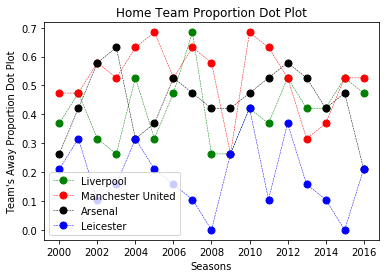

In [25]:
home,away,tie=test_func4("Liverpool")
plt.title('Home Team Proportion Dot Plot')
plt.plot(years_ints, away, 'ro',color='green', linestyle='dashed', linewidth = .5, 
         marker='o', markerfacecolor='green', markersize=7,label="Liverpool")
home,away,tie=test_func4("Man United")
plt.plot(years_ints, away, 'ro',color='red', linestyle='dashed', linewidth = .5, 
         marker='o', markerfacecolor='red', markersize=7,label="Manchester United")
home,away,tie=test_func4("Arsenal")
plt.plot(years_ints, away, 'ro',color='black', linestyle='dashed', linewidth = .5, 
         marker='o', markerfacecolor='black', markersize=7,label="Arsenal")
home,away,tie=test_func4("Newcastle")
plt.plot(years_ints, away, 'ro',color='blue', linestyle='dashed', linewidth = .5, 
         marker='o', markerfacecolor='blue', markersize=7,label="Leicester")
plt.xlabel('Seasons')
plt.legend()
plt.ylabel("Team's Away Proportion Dot Plot")

On Twitter interaction project, we found that the most popular teams are Liverpool, Manchester United and Arsenal. Therefore, we analyzed the away wining percentage (the percentages of wins in away games, #away win/#away games) of the three teams and leicester city, a medium team. The comparison between Arsenal and Leicester city shows an impressing difference between the support around the country of two teams. From the plot above We can see that all three top teams win significantly more away games than Leicester City does. Therefore, fan population and distribution do have effect on match result. Due to the increase of away support for strong teams, weak teams tend to lose more even at home. 

In [26]:
# Here we found a visualization from Twitter to support our reasoning of better and stronger teams having more
# followers on twitter (a strong, bigger fan base).
url = 'https://interactive.twitter.com/premierleague/?fbclid=IwAR22TfnPJtBFsPlihbV5FLbWbrz4TEsDNeLUoO3Jic3pv-mYeSnTWd1VdDs#?mode=team&teamId=all'
webbrowser.open(url)

True

## Fanbase Popularity

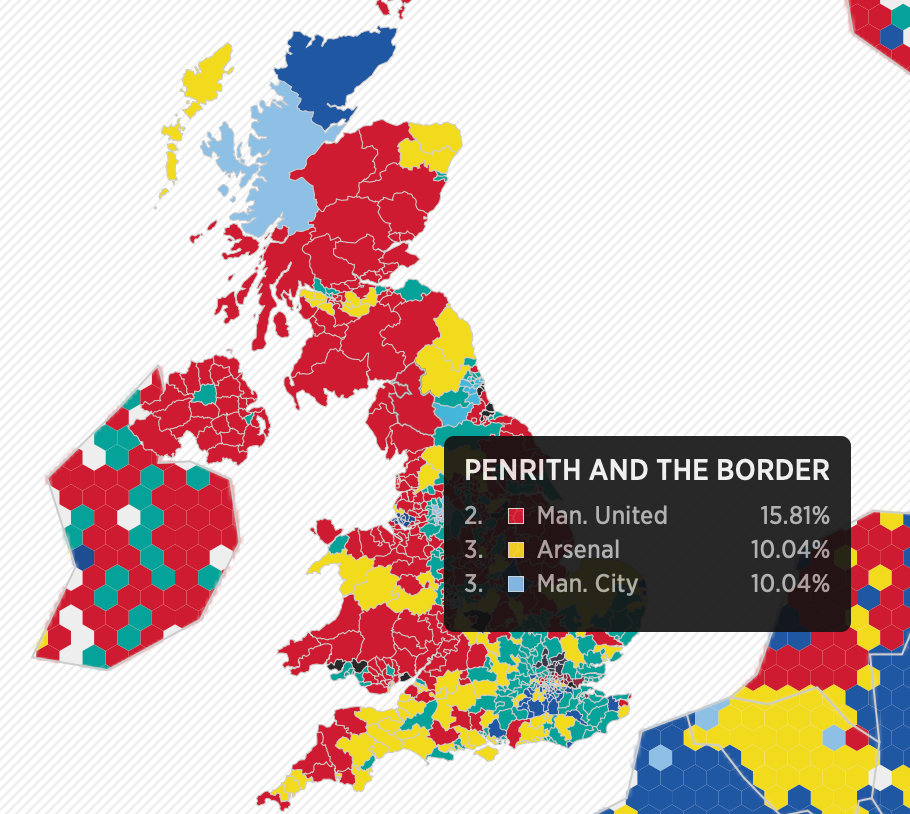

In [27]:
Image(filename='Penrith&Border.png')

As we can see from this image, Manchester United has the highest percentage of fans in comparison to its rivals Arsenal and Manchester City.  The key shows that Manchester United represents the red.  On the map, we see that a majority of the map is red, which represents the distribution of their fans.  This supports our throry that teams who win more games have a bigger fanbase.

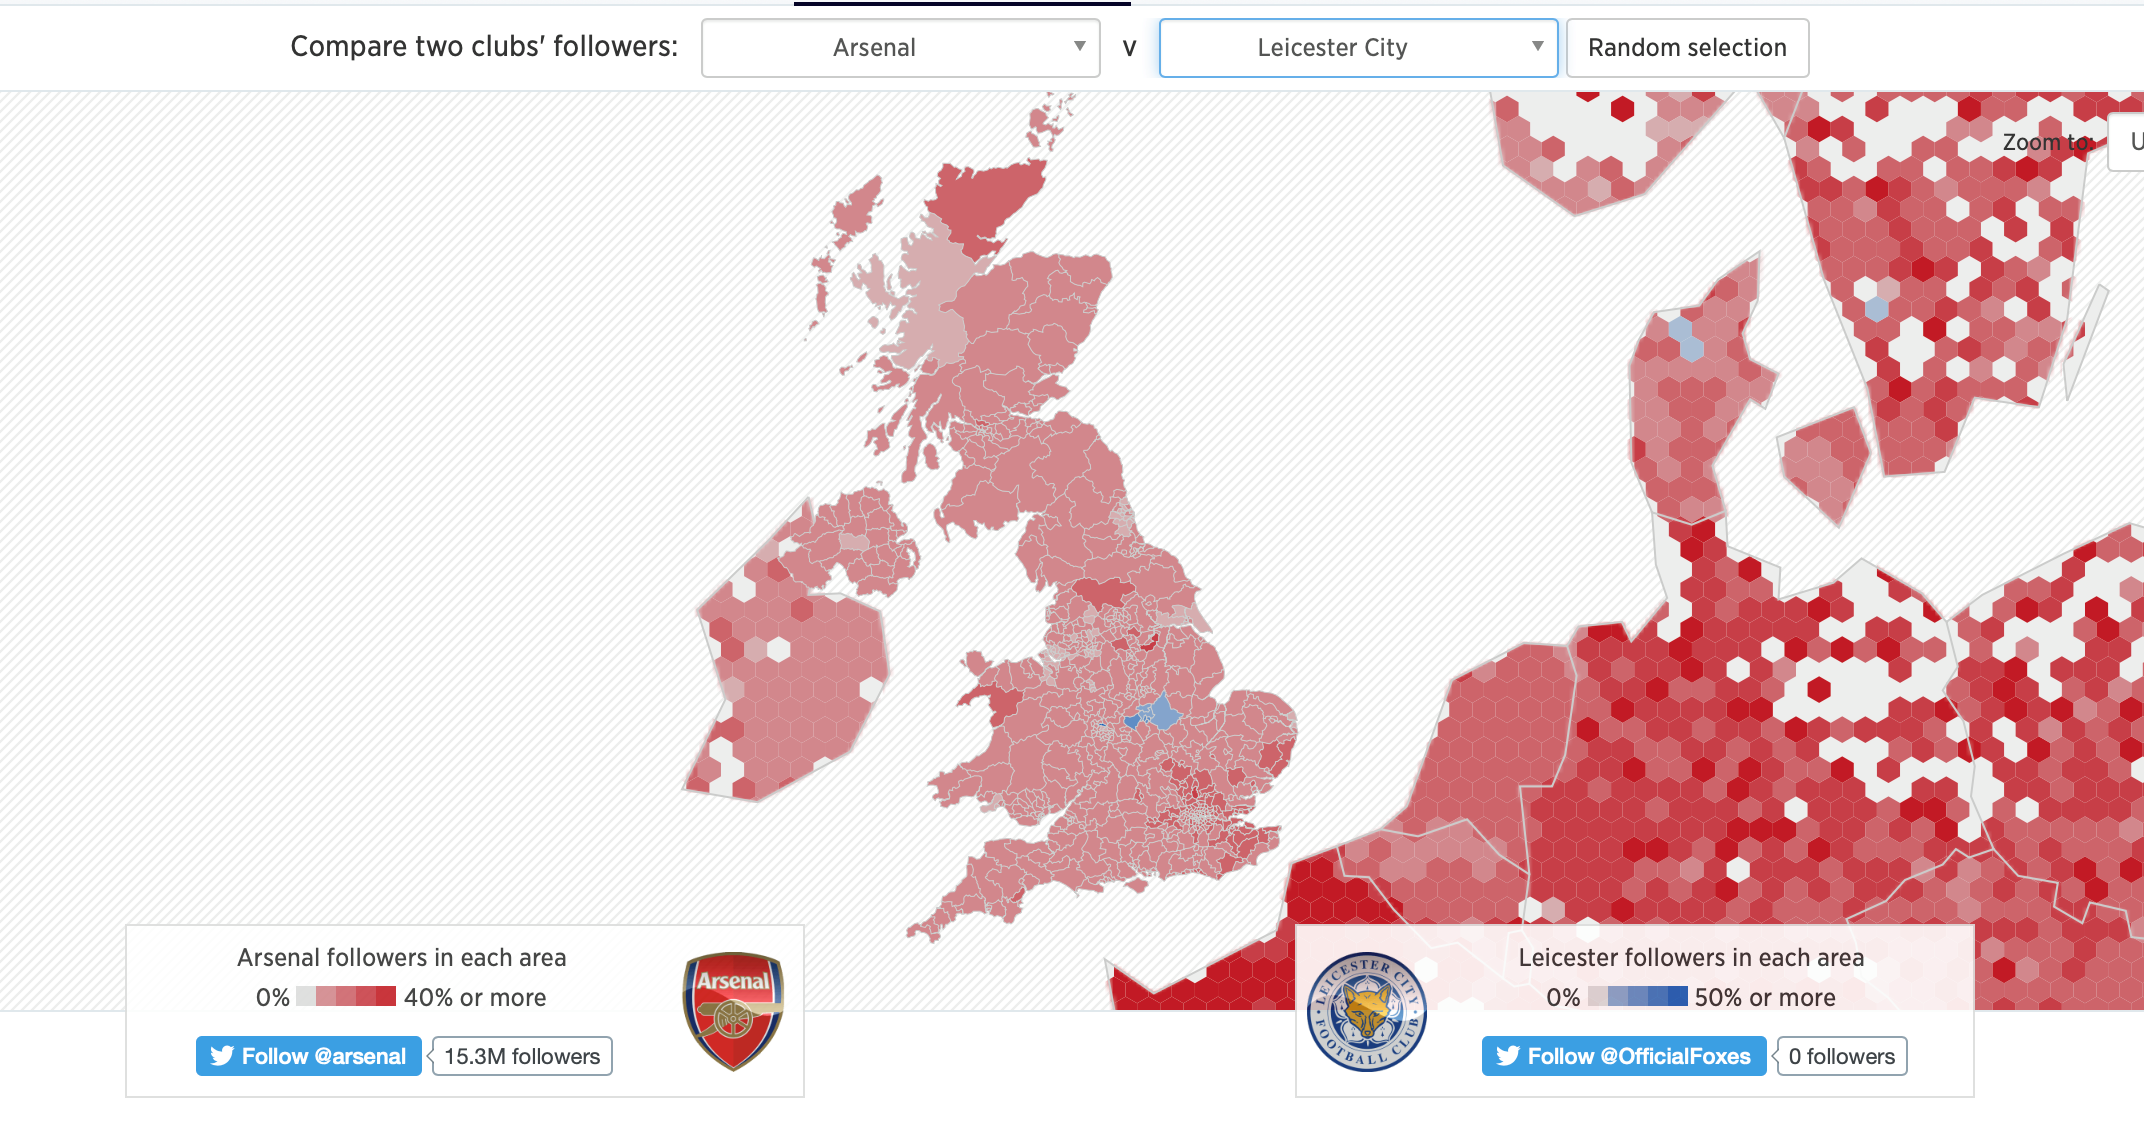

In [28]:
Image(filename='ArsenalvsLeicester.png')

This image shows that the Arsenal soccer team has a much stronger spreadout fanbase in comparison to the Leicester soccer team.  All of the red is a representation of where most of the the Arsenal fanbase is concentrated whereas the blue is where the Leicester fanbase is concentrated.  This supports our theory that teams with bigger fanbases often win more of their games than teams who have smaller fanbases.  As we can see from their twitter followers, Arsenal has over 15.3 million followers.  Leicester has closer to 0 followers.


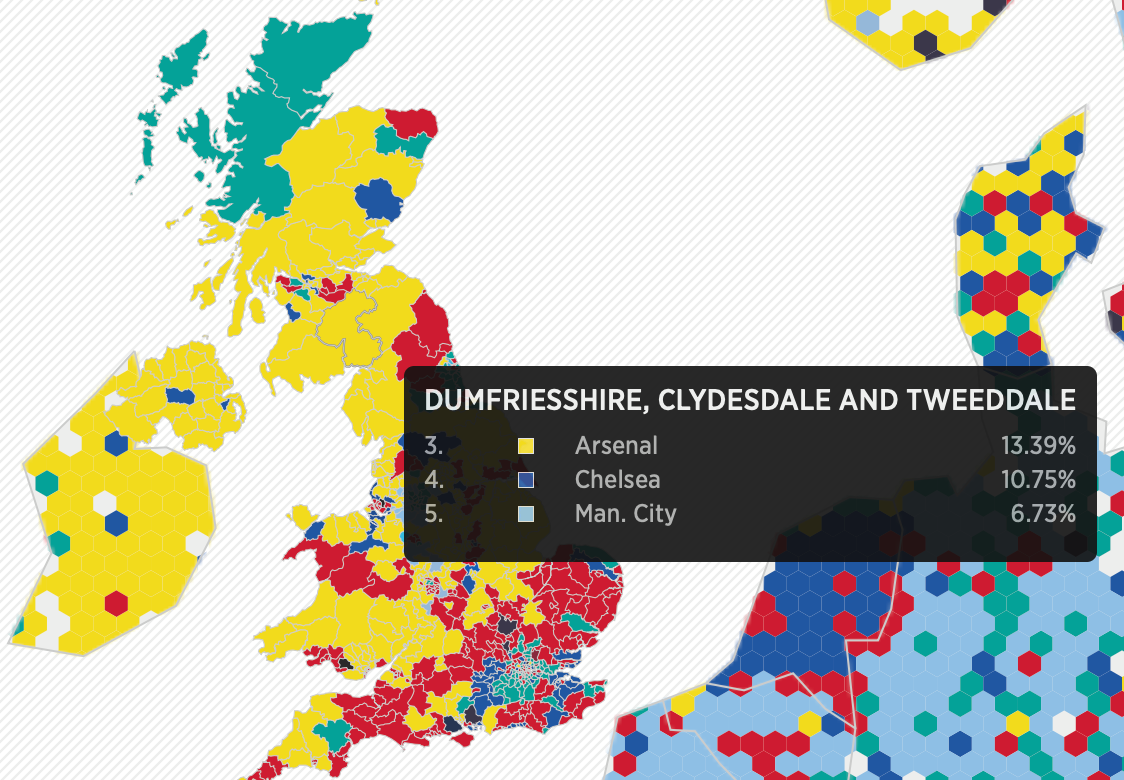

In [29]:
Image(filename='Dumfriesshire,Clydesdale,Tweedale.png')

As we can see here, Arsenal represents the yellow on the map, Chelsea reprsented the dark blue, and Machester City represented the light blue.  This shows that Arsenal has a larger fanbase because the yellow color is more spreadout on the map, showing a larger, more concentrated fanbase.  The percentage of fans for Manchester City is much lower. 

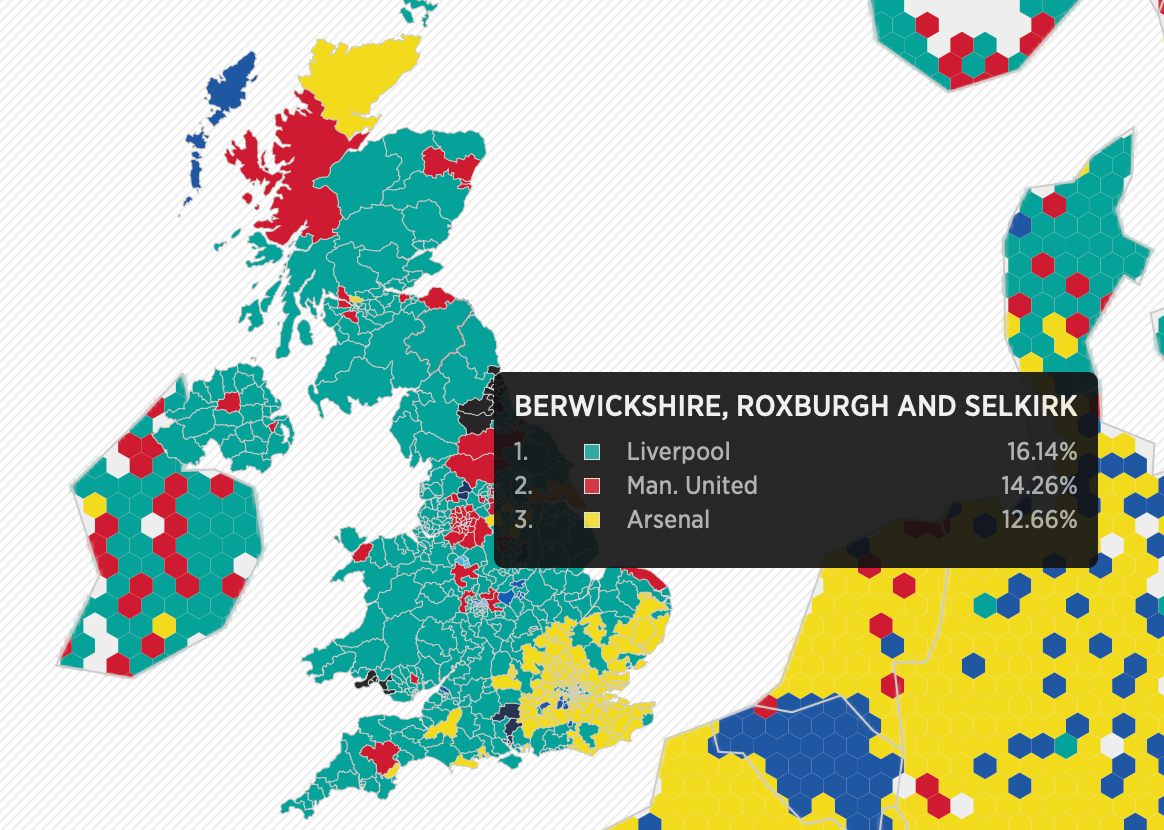

In [30]:
Image(filename='Berwickshire.png')

As we can see here, Liverpool has a much larger fanbase because a majority of the map represents green. A team's fanbase is often based on area of where the team represents.  As discussed earlier, Arsenal was a more popular team based in a different geographical region, however in this region, we see that Liverpool dominates this area.

# Discussion

As our research shows, we found that home team advantage does indeed exist within the field of soccer.  In addition to our findings, we were able to solve some reasons as to why there is a decrease in home team advantage.  Interestingly, one major detail we found is that the top four teams of the English Premier League have a strong and bigger fan base.  This supports our theory that fan bases grow larger over the years since each of these top teams play better over the seasons.  Smaller, newer teams that enter La Liga often only remain in the league for one season.  Their fan base is significantly smaller than the fan base size of the top teams.  This can be found in the twitter interaction website linked above.

Furthermore, we found that there is a large standard deviation for points per season increases over time.  As we can see from the graph, the gap becomes larger over the years.  This supports our claim that top teams are winning more over the years and getting better and stronger while smaller less popular teams are remaining stagnant in terms of their winnings over the years.

# Ethical Considerations

Since the dataset for La Liga is publicly available, there is minimal concern for ethical issues to arise.  Players are aware 
that their information is available for anyone to view. 

This dataset has no biases presented because all data is factually and numerically represented.  The data is quite comprehensive because the data has been recorded from the past 47 years of La Liga. This eliminates errors common in smaller data sets.

We eliminated the players column in order to anonymize our data.  This allows for privacy of each player while conducting our research.

The dataset used is also for non-commercial purposes for our project.  The research conducted is purely for our science procedures to solve if goals scored by a team correlate to a team’s final ranking.   

We ensure that there is no conflict of interest in our scientific procedures since a majority of the data is anonymized.  We did not utilize specific player info, since our research was mainly based on an overall team’s performance. 


# Conclusion

In conclusion, our hypothesis was correct. We expected a home advantage to exist within the soccer league because it is known to be a phenomenon in other sports such as basketball. We also expected the effectiveness of the home advantage to be decreasing over time because the number of away fans among crowds would be increasing. Although our predictions were true, there were other factors that led to this result.

We were able to prove the existence of a home advantage by comparing the proportion of wins among home games played versus the proportion of wings among away games played. We found the home win proportions to be consistently and significantly higher than the away win proportions. This could be attributed to home crowd involvement, the rigors of travel, and officiating calls being made in favor of the home team.

With the existence of the home advantage proven, we looked at home advantage from a league wide viewpoint and found it to actually be decreasing with every season. However, this is not true every individual team. As a league, home advantage is decreasing because bad teams are continuing to lose more and more games, including the ones at home, whereas good teams are increasingly getting better record wise. In La Liga, there are only a couple soccer teams that remain consistently at the top of the standings year after year. Most of the teams in the league are severely underperforming. The number of games won by top tier clubs are increasing over time resulting in fewer wins among other teams in the rest of the league. Because the league is so skewed, the few best teams cannot offset the majority of the association. This occurrence could be explained by the fact that good teams continue to attract good players. Because there is no salary cap in soccer, clubs that pay players more will acquire the best players resulting in more wins which, in turn, brings in more fans and revenue. This large fan base and revenue allows for the best clubs to have more money to offer bigger contacts to top talent in order to maintain their loaded rosters. This cycle maintains the hierarchy that currently exists in the league.
